#**Model Dataset Covid-19 Menggunakan Metode Transfer Learning (VGG16)**
___
###### Tubes Kecerdasan Buatan

# 01. Initializing

### #001 - Mount Google Drive

In [1]:
# Mount GDrive : Untuk menyimpan hasil maupun mengambil file dari GDrive untuk diolah
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


### #002 - Create Required Folders

In [2]:
# Kita buat beberapa folder yang akan kita gunakan untuk menampung hasil dari pemrosesan nanti
# importing os module 
def create_dir(folderName):
  import os

  # Parent Directory path
  parent_dir = "/content/gdrive/MyDrive/Colab Notebooks/Transfer Learning (Image Classification)"

  directory_name = folderName

  # Path
  path = os.path.join(parent_dir, directory_name)

  # Create the directory

  try:
      os.mkdir(path)
      print("Directory " + directory_name + " created")
  except OSError as error:
      print(error)

# 01 - Membuat folder dengan nama 'Dataset Original' ---> Untuk menampung dataset kita
create_dir("Dataset Original")

# 02 - Membuat folder dengan nama 'Analyze Dataset' ---> Untuk menampung hasil proses splitting dan cek dataset
create_dir("Analyze Dataset")

# 03 - Membuat folder dengan nama 'Model Dataset' ---> Pada tahap ini kita telah memg-compile model kita dan menyimpannya di folder ini
create_dir("Model Dataset") 

# 04 - Membuat folder dengan nama 'Test Algorithm' ---> Voila!, test your dataset and save them here 
create_dir("Test Algorithm")

Directory Dataset Original created
Directory Analyze Dataset created
Directory Model Dataset created
Directory Test Algorithm created


### #003A - Import Dataset From Github (Sample Draft)

In [ ]:
# Download dataset dari github dan masukkan kedalam directory tmp google collab

# Dataset daun nangka
!wget --no-check-certificate  \
https://github.com/rasvanjaya21/Dataset-Daun-Nangka-dan-Pepaya_366_354/raw/master/Dataset/Daun%20Nangka.zip \
-O /content/gdrive/MyDrive/Colab Notebooks/Transfer Learning (Image Classification)/Dataset Original/Daun_Nangka.zip

# Dataset daun pepaya 
!wget --no-check-certificate  \
https://github.com/rasvanjaya21/Dataset-Daun-Nangka-dan-Pepaya_366_354/raw/master/Dataset/Daun%20Pepaya.zip \
-O /content/gdrive/MyDrive/Colab Notebooks/Transfer Learning (Image Classification)/Dataset Original/Daun_Pepaya.zip

### #003B - Import Dataset From Kaggle (✅)

In [4]:
# Membuat folder dengan nama 'Kaggle' jika menggunakan kaggle ---> untuk menyimpan kaggle.json (token) yang didapat dari akun kaggle
import os
directory_name = "Kaggle"

parent_dir = "/content/gdrive/MyDrive/Colab Notebooks"

# Path
path = os.path.join(parent_dir, name_directory)

# Create the directory
try:
    os.mkdir(path)
    print("Directory " + directory_name + " created")
except OSError as error:
    print(error)

[Errno 17] File exists: '/content/gdrive/MyDrive/Colab Notebooks/Kaggle'


In [5]:
# Assign KAGGLE_CONFIG_DIR
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Colab Notebooks/Kaggle"

In [6]:
%cd /content/gdrive/MyDrive/Colab Notebooks/Kaggle

/content/gdrive/MyDrive/Colab Notebooks/Kaggle


In [7]:
# Upload Kaggle.json cukup 1 kali for Validate Token
import os
from google.colab import files

if os.path.isfile("kaggle.json") == True :
  print("kaggle.json is already added !")
else :
  uploaded = files.upload()

  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 68 bytes


In [8]:
%cd "/content/gdrive/MyDrive/Colab Notebooks/Transfer Learning (Image Classification)/Dataset Original"

/content/gdrive/MyDrive/Colab Notebooks/Transfer Learning (Image Classification)/Dataset Original


In [9]:
# Download dataset dari Kaggle (Dataset daun herbal) // API Commands
!kaggle datasets download -d prashant268/chest-xray-covid19-pneumonia

100% 2.05G/2.06G [00:21<00:00, 51.6MB/s]
100% 2.06G/2.06G [00:21<00:00, 103MB/s] 


### #003C - Import Dataset From GDrive (Sample Draft)

In [ ]:
# Copy Dataset from Shared Folder to Local GDrive
!cp "/content/gdrive/MyDrive/Shared Folder/Dataset/dataset-toga.zip" "/content/gdrive/MyDrive/Colab Notebooks/Transfer Learning (Image Classification)/Dataset Original"

# 02. Preprocessing

### #001 - Masuk folder Dataset

In [10]:
# Mengarahkan terminal environment ke folder dataset berada
%cd "/content/gdrive/MyDrive/Colab Notebooks/Transfer Learning (Image Classification)/Dataset Original"

/content/gdrive/MyDrive/Colab Notebooks/Transfer Learning (Image Classification)/Dataset Original


### #002 - Mengecek isi Folder Dataset Original

In [12]:
# Mengecek isi dari folder directory saat ini
!ls

chest-xray-covid19-pneumonia.zip


### #003 - Unzip File Dataset

In [13]:
# Unzip file dan hapus zip file
!unzip \*.zip

Streaming output truncated to the last 5000 lines.
  inflating: Data/train/COVID19/COVID19(228).jpg  
  inflating: Data/train/COVID19/COVID19(229).jpg  
  inflating: Data/train/COVID19/COVID19(23).jpg  
  inflating: Data/train/COVID19/COVID19(230).jpg  
  inflating: Data/train/COVID19/COVID19(231).jpg  
  inflating: Data/train/COVID19/COVID19(232).jpg  
  inflating: Data/train/COVID19/COVID19(233).jpg  
  inflating: Data/train/COVID19/COVID19(234).jpg  
  inflating: Data/train/COVID19/COVID19(235).jpg  
  inflating: Data/train/COVID19/COVID19(236).jpg  
  inflating: Data/train/COVID19/COVID19(237).jpg  
  inflating: Data/train/COVID19/COVID19(238).jpg  
  inflating: Data/train/COVID19/COVID19(239).jpg  
  inflating: Data/train/COVID19/COVID19(24).jpg  
  inflating: Data/train/COVID19/COVID19(240).jpg  
  inflating: Data/train/COVID19/COVID19(241).jpg  
  inflating: Data/train/COVID19/COVID19(242).jpg  
  inflating: Data/train/COVID19/COVID19(243).jpg  
  inflating: Data/train/COVID19/C

### #004 - Move Dataset

In [14]:
# Memindah folder train dan val ke Analyze Dataset
# Dataset train
!mv "/content/gdrive/MyDrive/Colab Notebooks/Transfer Learning (Image Classification)/Dataset Original/Data/train" "/content/gdrive/MyDrive/Colab Notebooks/Transfer Learning (Image Classification)/Analyze Dataset" 

# Dataset test/val
!mv "/content/gdrive/MyDrive/Colab Notebooks/Transfer Learning (Image Classification)/Dataset Original/Data/test" "/content/gdrive/MyDrive/Colab Notebooks/Transfer Learning (Image Classification)/Analyze Dataset" 

# 03. Analyze Dataset

### #001 - Pengecekan jumlah dataset (data training dan data validasi)

In [15]:
import os

# we save train dataset as train, and test dataset as val
train_dir = "/content/gdrive/MyDrive/Colab Notebooks/Transfer Learning (Image Classification)/Analyze Dataset/train"
val_dir = "/content/gdrive/MyDrive/Colab Notebooks/Transfer Learning (Image Classification)/Analyze Dataset/test"

# Path Train Per Class
covid_19_train_path = train_dir + "/COVID19"
normal_train_path = train_dir + "/NORMAL"
pneumonia_train_path = train_dir + "/PNEUMONIA"

# Path Val Per Class
covid_19_val_path = val_dir + "/COVID19"
normal_val_path = val_dir + "/NORMAL"
pneumonia_val_path = val_dir + "/PNEUMONIA"

# Len Train Per Class
covid_19_len_train = len(os.listdir(covid_19_train_path))
normal_len_train = len(os.listdir(normal_train_path))
pneumonia_len_train = len(os.listdir(pneumonia_train_path))

# Len Val Per Class
covid_19_len_val = len(os.listdir(covid_19_val_path))
normal_len_val = len(os.listdir(normal_val_path))
pneumonia_len_val = len(os.listdir(pneumonia_val_path))

print("Jumlah dataset training                : ", covid_19_len_train + normal_len_train + pneumonia_len_train)
print("Jumlah dataset validasi                : ", covid_19_len_val + normal_len_val + pneumonia_len_val)
print()
print("Jumlah train kelas covid 19            : ", covid_19_len_train)
print("Jumlah train kelas normal              : ", normal_len_train)
print("Jumlah train kelas pneumonia           : ", pneumonia_len_train)
print()
print("Jumlah validasi kelas covid 19         : ", covid_19_len_val)
print("Jumlah validasi kelas normal           : ", normal_len_val)
print("Jumlah validasi kelas pneumonia        : ", pneumonia_len_val)


Jumlah dataset training                :  5144
Jumlah dataset validasi                :  1288

Jumlah train kelas covid 19            :  460
Jumlah train kelas normal              :  1266
Jumlah train kelas pneumonia           :  3418

Jumlah validasi kelas covid 19         :  116
Jumlah validasi kelas normal           :  317
Jumlah validasi kelas pneumonia        :  855


### #002 - Pengecekan Format nama dan ekstensi

In [16]:
train_covid_19_fnames = os.listdir(covid_19_train_path)
train_normal_fnames = os.listdir(normal_train_path)
train_pneumonia_fnames = os.listdir(pneumonia_train_path)

print("covid 19           : ", train_covid_19_fnames[:10])
print("normal             : ", train_normal_fnames[:10])
print("pneumonia          : ", train_pneumonia_fnames[:10])

covid 19           :  ['COVID19(0).jpg', 'COVID19(1).jpg', 'COVID19(10).jpg', 'COVID19(100).jpg', 'COVID19(101).jpg', 'COVID19(102).jpg', 'COVID19(103).jpg', 'COVID19(104).jpg', 'COVID19(105).jpg', 'COVID19(106).jpg']
normal             :  ['NORMAL(0).jpg', 'NORMAL(1).jpg', 'NORMAL(10).jpg', 'NORMAL(100).jpg', 'NORMAL(1000).jpg', 'NORMAL(1001).jpg', 'NORMAL(1002).jpg', 'NORMAL(1003).jpg', 'NORMAL(1004).jpg', 'NORMAL(1005).jpg']
pneumonia          :  ['PNEUMONIA(0).jpg', 'PNEUMONIA(1).jpg', 'PNEUMONIA(10).jpg', 'PNEUMONIA(100).jpg', 'PNEUMONIA(1000).jpg', 'PNEUMONIA(1001).jpg', 'PNEUMONIA(1002).jpg', 'PNEUMONIA(1003).jpg', 'PNEUMONIA(1004).jpg', 'PNEUMONIA(1005).jpg']


### #003 - Melihat gambar yang akan dilatih

In [17]:
# import terlebih dahulu library yang diperlukan
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameter dari visualisasi dimana terdiri dari 4 kolom
nrows = 20
ncols = 4

# Inisialisasi nilai awal untuk melakukan iterasi
pic_index = 0

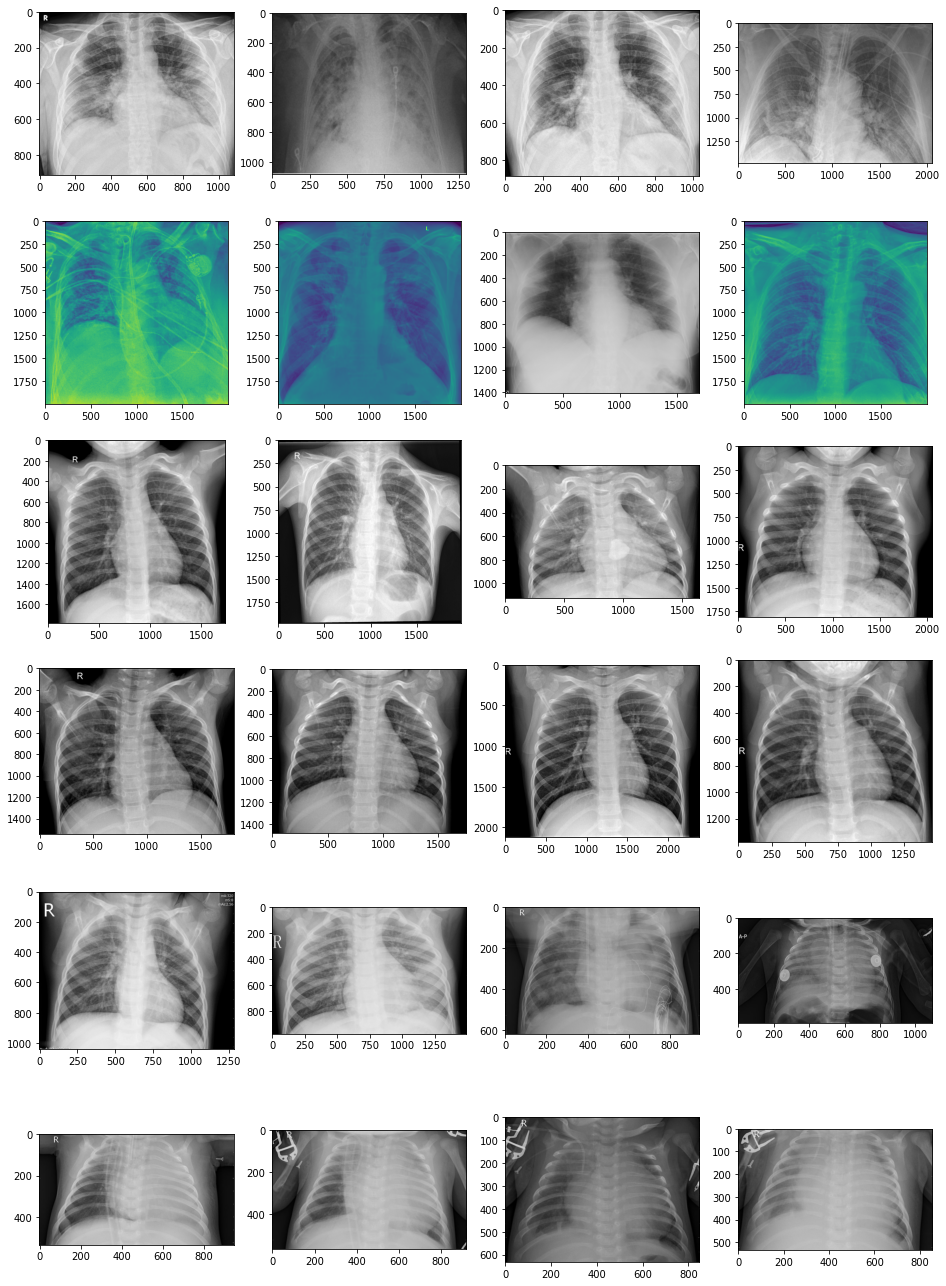

In [18]:
# Mengatur matplotlib fig, dan ukuran visualisasi ke 4x4 pics

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 20

next_covid_19_pix = [os.path.join(covid_19_train_path, fname)
                   for fname in train_covid_19_fnames[pic_index-8:pic_index]
                  ]

next_normal_pix = [os.path.join(normal_train_path, fname)
                   for fname in train_normal_fnames[pic_index-8:pic_index]
                  ]

next_pneumonia_pix = [os.path.join(pneumonia_train_path, fname)
                   for fname in train_pneumonia_fnames[pic_index-8:pic_index]
                  ]

for i, img_path in enumerate(next_covid_19_pix + next_normal_pix + next_pneumonia_pix):
  # Menyeting subplot
  sp = plt.subplot(nrows, ncols, i + 1)
  # set axis 'on' to show gridlines else hide
  sp.axis("on")

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show() 

# 04. Data Augmentation

### #001 - Description and Purpose

**Augmentasi Data** adalah suatu proses dalam pengolahan data gambar, augmentasi merupakan proses mengubah atau memodifikasi gambar sedemikian rupa sehingga komputer akan mendeteksi bahwa gambar yang diubah
adalah gambar yang berbeda, namun manusia masih dapat mengetahui bahwa gambar yang diubah tersebut adalah
gambar yang sama

**Tujuan Augmentasi Data** :
*   Pada kasus ini dilakukan augmentasi untuk menghindari adanya overfitting pada saat pelatihan
*   Augmentasi memungkinkan gambar training untuk dioptimalisasi seluruh infomasinya seperti melakukan rotate, shear, zoom, horizontal_flop, dan lainnya sehingga ketika model dilatih menggunakan data yang memiliki angel (posisi) yang berbeda dapat teratasi karena menerapkan augmentasi.

### #002 - Augmentation Process

In [19]:
# set width, height and batch_size
width=150
height=150
batch_size=64

In [20]:
# Mempersiapkan generator untuk melakukan : 
# a. Augmentasi Data
# b. Melakukan normalisasi pada pixel image dsb menggunakan library Keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

image_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='reflect')

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# Flow training images menggunakan train_datagen generator
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
train_generator = image_datagen.flow_from_directory(train_dir,
                                                    target_size=(height, width),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Flow validation images menggunakan val_datagen generator
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
validation_generator = image_datagen.flow_from_directory(val_dir,
                                                        target_size=(height, width),
                                                        batch_size=batch_size,
                                                        class_mode='categorical')


Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


# 05. Build Architectur Model and Fit Model

### #001 - Requirement Setting

In [21]:
# import library yang dibutuhkan
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten,Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [22]:
# Definisikan dan setting callback untuk :
# 1. Memantau performa model
# 2. Melakukan save model terbaik menggunakan model checkpoint
# 3. Memberhentikan pelatihan ketika tidak memnuhi syarat dalam parameter earlystopping

callbacks = EarlyStopping(monitor = "val_loss", patience = 30, verbose = 1, mode = "auto")        
directory_to_save_best_model_file = "/content/gdrive/MyDrive/Colab Notebooks/Transfer Learning (Image Classification)/Model Dataset/model_drop_batch_weight_from_callback.h5"
best_model = ModelCheckpoint(directory_to_save_best_model_file, monitor= "val_accuracy", verbose = 1, save_best_only = True)

In [23]:
# Definisikan pretrained model yang ingin digunakan
VGG16_base = tf.keras.applications.VGG16(include_top=False, weights='imagenet', #include_top = false , berarti fully connected layer akan dipidah dari arsitektur
                                                 input_tensor=None, input_shape=(height, width,3))


58900480/58889256 [==============================] - 1s 0us/step


### #002 - Fully Connected Layer

In [25]:
# Adding some of layer and setting dropout more big to avoid Overffiting in my model
output = VGG16_base.get_layer(index = -1).output  
output = Flatten()(output)
output = Dense(512,activation = "relu")(output)
output = BatchNormalization()(output)
output = Dropout(0.5)(output)
output = Dense(1024,activation = "relu")(output)
output = BatchNormalization()(output)
output = Dropout(0.5)(output)
output = Dense(3, activation='softmax')(output) 
print('New layers Finishing Added !')

New layers Finishing Added !


### #003 - Result from Model Summary

In [26]:
# Print model summary
VGG16_model = Model(VGG16_base.input, output)
for layer in VGG16_model.layers[:-7]:
    layer.trainable = False

VGG16_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

### #004 - Compiling Model

In [27]:
# Compile model
VGG16_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.002), loss="categorical_crossentropy", 
                        metrics =["accuracy"])

In [28]:
# Fitting model
history = VGG16_model.fit(train_generator,
                          epochs = 80, # images = batch_size * steps
                          verbose = 1,
                          validation_data = validation_generator,
                          callbacks = [callbacks, best_model])

Epoch 1/80
81/81 [==============================] - ETA: 0s - loss: 0.6903 - accuracy: 0.8105
Epoch 00001: val_accuracy improved from -inf to 0.86180, saving model to /content/gdrive/MyDrive/Colab Notebooks/Transfer Learning (Image Classification)/Model Dataset/model_drop_batch_weight_from_callback.h5
81/81 [==============================] - 248s 3s/step - loss: 0.6903 - accuracy: 0.8105 - val_loss: 0.7927 - val_accuracy: 0.8618
Epoch 2/80
81/81 [==============================] - ETA: 0s - loss: 0.3883 - accuracy: 0.8820
Epoch 00002: val_accuracy improved from 0.86180 to 0.88587, saving model to /content/gdrive/MyDrive/Colab Notebooks/Transfer Learning (Image Classification)/Model Dataset/model_drop_batch_weight_from_callback.h5
81/81 [==============================] - 211s 3s/step - loss: 0.3883 - accuracy: 0.8820 - val_loss: 0.4839 - val_accuracy: 0.8859
Epoch 3/80
81/81 [==============================] - ETA: 0s - loss: 0.3066 - accuracy: 0.8946
Epoch 00003: val_accuracy improved fr

# 06. Model Evaluation

### #001 - Using Graph

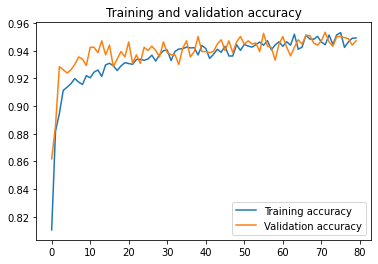

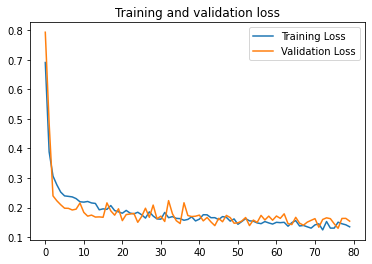

In [29]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

# =================================
# 1 - Training and Validation Graph 
# =================================

# Retrieve a list of list results on training and test data
# sets for each training epoch

plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

# ======================================
# 2 - Training and Validation Loss Graph 
# ======================================

# Plot training and validation loss per epoch

plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### #002 - Using Confusion Metrix

In [30]:
# Import library yang dibutuhkan 
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.metrics import precision_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np
sns.set(style="whitegrid")

In [31]:
# loading model to evaluate more depth
from keras.models import load_model
model_path = "/content/gdrive/MyDrive/Colab Notebooks/Transfer Learning (Image Classification)/Model Dataset/model_drop_batch_weight_from_callback.h5"
model = load_model(model_path)

Found 1288 images belonging to 3 classes.
21/21 [==============================] - 35s 2s/step
Accuracy  : 0.9355590062111802
Precision : 0.9399000981294968
f1Score : 0.9366968925167531
[[112   2   2]
 [  0 296  21]
 [  0  58 797]]


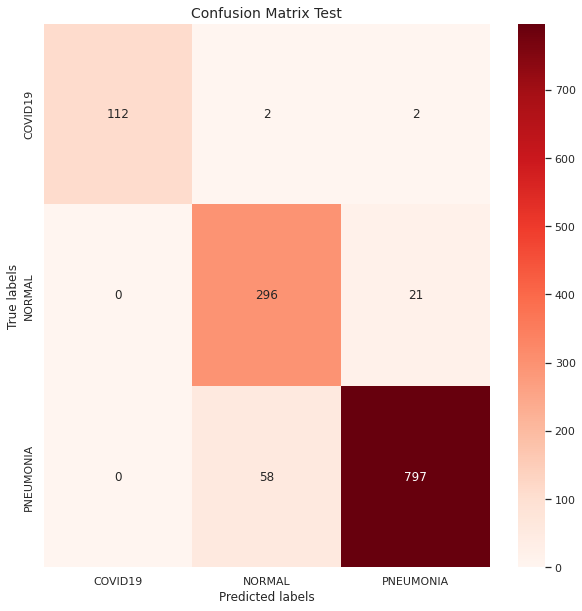

In [36]:
def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='weighted')
    f1Score=f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    cm=confusion_matrix(y_true, y_pred)
    print(cm)
    return accuracy, precision, f1Score

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_generator = val_datagen.flow_from_directory(val_dir,
                                                batch_size=batch_size,                                                             
                                                target_size=(height, width),
                                                class_mode= None,
                                                shuffle=False)

predictions = model.predict(val_generator, verbose=1)
yPredictions = np.argmax(predictions, axis=1)
true_classes = val_generator.classes
class_names = val_generator.class_indices
Cmatrix_test = confusion_matrix(true_classes, yPredictions)

testAcc,testPrec, testFScore = my_metrics(true_classes, yPredictions)

plt.figure(figsize=(10,10))
ax= plt.subplot()
data = np.asarray(Cmatrix_test).reshape(3,3)
sns.heatmap(data,annot=True, fmt='',ax=ax, cmap=plt.cm.Reds)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)   
ax.yaxis.set_ticklabels(class_names)
plt.title('Confusion Matrix Test',fontsize=14)
plt.show()

### #003 - Using Classification Report

In [37]:
from sklearn.metrics import classification_report
print(classification_report(true_classes, yPredictions, target_names=class_names))

              precision    recall  f1-score   support

     COVID19       1.00      0.97      0.98       116
      NORMAL       0.83      0.93      0.88       317
   PNEUMONIA       0.97      0.93      0.95       855

    accuracy                           0.94      1288
   macro avg       0.93      0.94      0.94      1288
weighted avg       0.94      0.94      0.94      1288



# Changelog : 

###### - Initial CNN Architecture
###### - Build with new dataset
###### - Changed optimizer RMSProp to Adam
###### - Last edited 22:37 20/12/21